# T-Test for Equivalence

In [1]:
import numpy as np
import statsmodels.stats.weightstats as ws

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 15
sns.set()

# T-test for Equivalence (statsmodels.stats.weightstats.ttost_ind)

**Reference:**

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttost_ind.html

statsmodels.stats.weightstats.ttost_ind(x1, x2, low, upp, usevar='pooled', weights=(None, None), transform=None)

test of (non-)equivalence for two independent samples

TOST: two one-sided t tests

null hypothesis: m1 - m2 < low or m1 - m2 > upp alternative hypothesis: low < m1 - m2 < upp 

where m1, m2 are the means, expected values of the two samples.

If the pvalue is smaller than a threshold, say 0.05, then we reject the hypothesis that the difference between the two samples is larger than the the thresholds given by low and upp.

**An operational reference that we follow for implementation details is:**

https://www.tandfonline.com/doi/pdf/10.1080/10543400701329422

Bland-Altman: AGREEMENT BETWEEN METHODS OF MEASUREMENT WITH MULTIPLE OBSERVATIONS PER INDIVIDUAL

**Also - NCSS Statistical Software has very good documentation on the subject:**

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Paired_T-Test_for_Equivalence.pdf

## Choosing equivalence bounds (limits of agreement)...
Bland-Altman says:

> We obtain the differences between measurements by the two methods for each
individual and calculate the mean and standard deviation. We then estimate the
95% limits of agreement as the two values mean minus 1.96 standard deviations
and mean plus 1.96 standard deviations. These limits are expected to contain the
difference between measurements by the two methods for 95% of pairs of future
measurements on similar individuals.

In [3]:
def run_ttost_ind(ctrl,test):
    # we use lower/upper bounds as control_mean +/- 1.96 control_std_dev
    mean = np.mean(ctrl)
    std = np.std(ctrl)
    lower = -1.96 * std
    upper = +1.96 * std
    print(mean, std, lower, upper)
    p, t1, t2 = ws.ttost_ind(x1=ctrl, x2=test, low=lower, upp=upper, usevar='unequal')
    if p < 0.05:
        msg = '---> Reject null hypothesis: m1 - m2 < low or m1 - m2 > upp. Accept alternative hypothesis: low < m1 - m2 < upp'
    else:
        msg = '---> No conclusion (cannot reject)'
    print('p=%.3f %s' % (p, msg))

100.05107113229441 1.987977472908876 -3.896435846901397 3.896435846901397
p=0.000 Reject null hypothesis: m1 - m2 < low or m1 - m2 > upp. Accept alternative hypothesis: low < m1 - m2 < upp


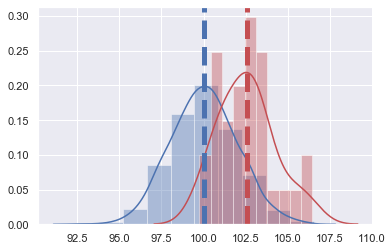

In [4]:
ctrl_std_dev = 2.0

ctrl = np.random.normal(100.0, ctrl_std_dev, 3000)
test = np.random.normal(103.0, ctrl_std_dev, 30)
run_ttost_ind(ctrl, test)

plt.figure()
ax1 = sns.distplot(color='b', bins=10, kde=True, norm_hist=True, a=ctrl)
ax2 = sns.distplot(color='r', bins=10, kde=True, norm_hist=True, a=test)
plt.axvline(color='b', linestyle='dashed', linewidth=5, x=np.mean(ctrl))
plt.axvline(color='r', linestyle='dashed', linewidth=5, x=np.mean(test))

#### Some example results
The difference in mean between Control and Test is varied to determine where the test indicates "reject".
We explore two different values of "n" and two different standard deviations.


| std dev | n    | no conclusion | reject | reject | no conclusion |
| ---     | ---  |  ---:         | :---   | ---:   | :---          |
| 1.0     |
|         | 3000 | -2.0 | -1.9 | 1.9 | 2.0 |
|         | 30   | -1.9 | -1.8 | 1.8 | 1.9 |
| 2.0     |
|         | 3000 | -3.9 | -3.0 | 3.7 | 3.9 |
|         | 30   | -3.6 | -3.0 | 3.0 | 3.6 |
